本文参考了 Sebastian Raschka 编写的《机器学习》。

# 第 5 章 通过降维压缩数据

训练数据要不要把方差归一化掉？

In [1]:
# 下载葡萄酒数据集
import pandas as pd

# df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# df_wine.head(5)
# # df_wine.to_csv('./df_wine.csv',index=None)

In [2]:
df_wine = pd.read_csv('./df_wine.csv')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [3]:
df_wine.head(5)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# 是一个三分类问题
df_wine['Class label'].unique()

array([1, 2, 3])

+ 分割训练数据集与测试数据集

In [5]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=666)

去掉均值。

In [6]:
# X_train_demean = X_train - X_train.mean(axis=0)
# X_test_demean = X_test - X_test.mean(axis=0)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaler = ss.fit_transform(X_train)
X_test_scaler = ss.fit_transform(X_test)

### 手动编写 PCA

In [8]:
# 得到协方差矩阵
cov_mat = np.cov(X_train_scaler.T)
# 得到特征值和特征向量
eig_vals, eig_vectors = np.linalg.eig(cov_mat)

In [9]:
np.set_printoptions(precision=6)
eig_vals

array([4.879144, 2.345023, 1.483711, 0.951998, 0.372254, 0.114802,
       0.160976, 0.290882, 0.204841, 0.235287, 0.697113, 0.763333,
       0.606326])

In [10]:
np.sort(eig_vals)

array([0.114802, 0.160976, 0.204841, 0.235287, 0.290882, 0.372254,
       0.606326, 0.697113, 0.763333, 0.951998, 1.483711, 2.345023,
       4.879144])

In [11]:
eig_vals

array([4.879144, 2.345023, 1.483711, 0.951998, 0.372254, 0.114802,
       0.160976, 0.290882, 0.204841, 0.235287, 0.697113, 0.763333,
       0.606326])

In [12]:
# 特征值降序排序
eig_vals_idx = np.argsort(-eig_vals)
eig_vals[eig_vals_idx]

array([4.879144, 2.345023, 1.483711, 0.951998, 0.763333, 0.697113,
       0.606326, 0.372254, 0.290882, 0.235287, 0.204841, 0.160976,
       0.114802])

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['STHeiti']
#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [14]:
from matplotlib.font_manager import _rebuild

_rebuild()

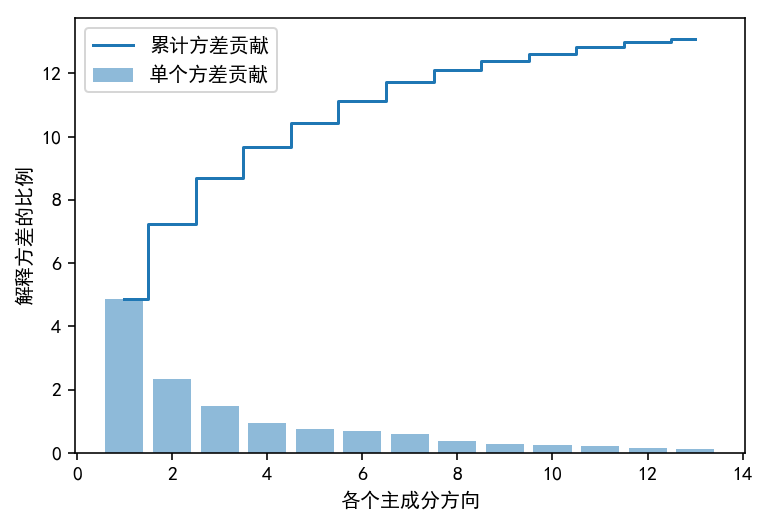

In [30]:
import matplotlib.pyplot as plt
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.bar(np.arange(1, len(eig_vals) + 1),
        eig_vals[eig_vals_idx], label='单个方差贡献', alpha=0.5, align='center')
plt.step(np.arange(1, len(eig_vals) + 1),
         eig_vals[eig_vals_idx].cumsum(), where='mid', label='累计方差贡献')
plt.xlabel('各个主成分方向')
plt.ylabel('解释方差的比例')
plt.legend()
plt.show()

### 主成分得到以后，就可以进行降维的工作了

降到 2 维方便可视化。

$$
X'=XW
$$

In [16]:
W = eig_vectors[:, :2]

In [17]:
X_train_pca = X_train_scaler.dot(W)

In [18]:
X_train_pca

array([[-3.340092,  1.283737],
       [ 0.541131, -2.61535 ],
       [ 0.777039, -3.416635],
       [ 1.694361, -1.888239],
       [-0.672899,  0.033774],
       [-0.680132, -1.537961],
       [-2.42611 ,  1.196618],
       [-2.53896 ,  1.057933],
       [ 2.695688,  1.992724],
       [ 2.231888, -0.675983],
       [-1.735315, -0.116802],
       [ 2.683239,  0.017636],
       [-1.146151,  0.167146],
       [-0.460536,  0.202732],
       [-2.600074,  0.832822],
       [-3.504933,  1.177368],
       [-0.407674, -2.275883],
       [-2.587835, -0.13983 ],
       [-2.229907,  0.544571],
       [ 2.338684,  2.016603],
       [ 2.397506,  2.121268],
       [ 0.319753, -2.315493],
       [-1.177651, -0.092178],
       [ 2.758624,  0.26642 ],
       [-1.972029,  1.331578],
       [ 2.899308,  0.214837],
       [ 2.544649,  0.303632],
       [ 2.170372,  0.090576],
       [-2.079316, -0.200505],
       [-1.759084, -1.486424],
       [-1.079559, -2.699899],
       [-1.914699,  1.45983 ],
       [

In [19]:
np.unique(y_train)

array([1, 2, 3])

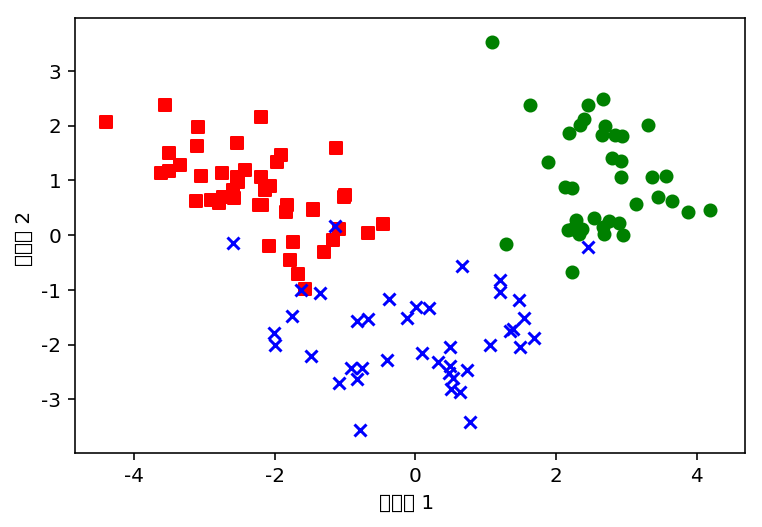

In [20]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1], c=c, marker=m, label=l)
plt.xlabel('主成分 1 ')
plt.ylabel('主成分 2 ')
plt.show()

In [21]:
np.unique(y_train)

array([1, 2, 3])

## 使用 scikit-learn 进行主成分分析

是个分类问题，所以我们首选使用 Logistic 回归来做。

In [22]:
# 画出决策边界的函数
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolutions=0.02):
    # resolutions 网格间隔
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min()-1,X[:,1].max()+1
    x2_min, x2_max = X[:,0].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolutions),
                         np.arange(x2_min, x2_max,resolutions))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    # 描出训练数据集的点
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

# 测试
x1_min, x1_max = 3,5
x2_min, x2_max = 4,6
resolutions=0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolutions),np.arange(x2_min, x2_max,resolutions))
np.array([xx1.ravel(),xx2.ravel()]).T

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] n

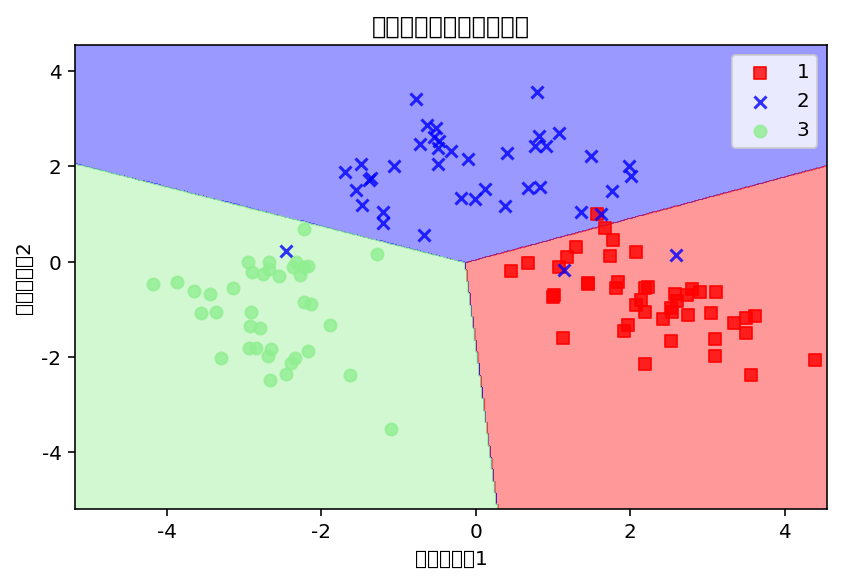

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca_sklearn = pca.fit_transform(X_train_scaler)
lr.fit(X_train_pca_sklearn,y_train)
plot_decision_regions(X_train_pca_sklearn,y_train,lr)
plt.xlabel('主成分方向1')
plt.ylabel('主成分方向2')
# 若标签重叠可使用 fig.tight_layout 自动调整标签的位置
plt.tight_layout()
plt.legend()
plt.title('训练数据集画出决策边界')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


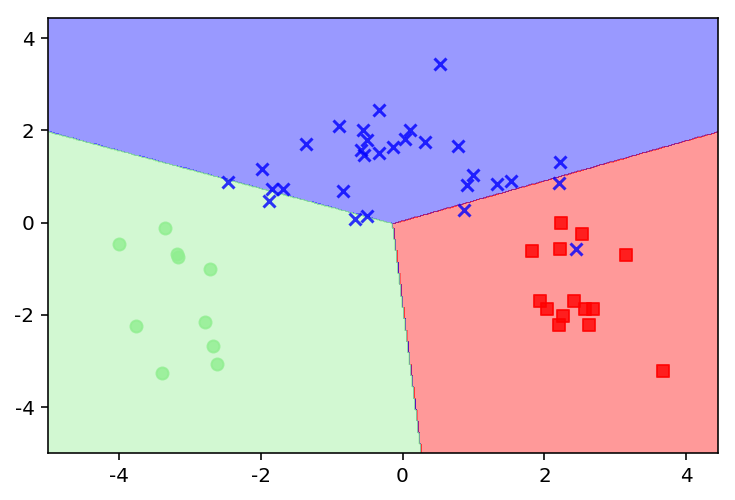

In [24]:
X_test_pca_sklearn = pca.transform(X_test_scaler)
plot_decision_regions(X_test_pca_sklearn,y_test,lr)

In [25]:
pca = PCA(n_components=None)
X_train_pca = pca.fit(X_train_scaler)
pca.explained_variance_

array([4.879144, 2.345023, 1.483711, 0.951998, 0.763333, 0.697113,
       0.606326, 0.372254, 0.290882, 0.235287, 0.204841, 0.160976,
       0.114802])

In [26]:
pca.explained_variance_ratio_

array([0.372292, 0.178932, 0.113211, 0.07264 , 0.058244, 0.053192,
       0.046264, 0.028404, 0.022195, 0.017953, 0.01563 , 0.012283,
       0.00876 ])

In [27]:
eig_vals[np.argsort(-eig_vals)]

array([4.879144, 2.345023, 1.483711, 0.951998, 0.763333, 0.697113,
       0.606326, 0.372254, 0.290882, 0.235287, 0.204841, 0.160976,
       0.114802])

In [28]:
1 + 2

3